Code taken from dense lego notebook in kaggle

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# I added this
path = r"C:\Users\allar\Documents\Neural Networks\Project 2\LEGOS\LEGO brick images v1"

# you're gonna want to minimize this output
from os import listdir
import os
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\allar\Documents\Neural Networks\Project 2\LEGOS\LEGO brick images v1\11214 Bush 3M friction with Cross axle\201706171006-0001.png
C:\Users\allar\Documents\Neural Networks\Project 2\LEGOS\LEGO brick images v1\11214 Bush 3M friction with Cross axle\201706171006-0002.png
C:\Users\allar\Documents\Neural Networks\Project 2\LEGOS\LEGO brick images v1\11214 Bush 3M friction with Cross axle\201706171006-0003.png
C:\Users\allar\Documents\Neural Networks\Project 2\LEGOS\LEGO brick images v1\11214 Bush 3M friction with Cross axle\201706171006-0004.png
C:\Users\allar\Documents\Neural Networks\Project 2\LEGOS\LEGO brick images v1\11214 Bush 3M friction with Cross axle\201706171006-0005.png
C:\Users\allar\Documents\Neural Networks\Project 2\LEGOS\LEGO brick images v1\11214 Bush 3M friction with Cross axle\201706171006-0006.png
C:\Users\allar\Documents\Neural Networks\Project 2\LEGOS\LEGO brick images v1\11214 Bush 3M friction with Cross axle\201706171006-0007.png
C:\Users\allar\Documents\Ne

In [2]:
import PIL
from keras.datasets import mnist

from keras.models import Sequential, load_model

from keras.layers import Dense, Dropout, Flatten

from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.utils.np_utils import to_categorical
from matplotlib import pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [4]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open(path + "\\3003 Brick 2x2" + "\\0001")
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\allar\\Documents\\Neural Networks\\Project 2\\LEGOS\\LEGO brick images v1\\3003 Brick 2x2\\0001'

In [6]:
del image

In [7]:
list_of_subcategories = os.listdir(path)

float32
(400, 400, 3)


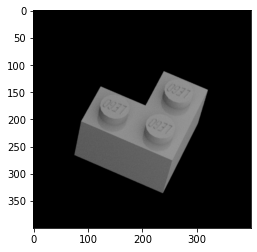

In [8]:
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread(path + "\\2357 brick corner 1x2x2 000L.png")
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [9]:
data[100]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [10]:
Lp = []
for k in range(200):
    for i in range(200):
        Lp += [np.mean(data[k][i])]
Lp = np.array(Lp)
Lp.shape

(40000,)

In [12]:
Lp[100]

0.0

In [8]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
def loadBatchImages(path):
    catList = listdir(path)
    L = []
    i = 0
    for cat in catList:
        deepPath = path+"\\"+cat+"\\"
        imageList = listdir(deepPath)
        indx = 0
        for images in imageList:                
            img = load_img(deepPath + images)
            img = img_to_array(img)
            L.append([i,img])
        i += 1
    return L

L = loadBatchImages(path)

In [9]:
np.array(L).shape

C:\Users\allar\anaconda3\envs\Tensorflow compat\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(6379, 2)

In [10]:
df = pd.DataFrame(L,columns = ['labels','pictures'])

In [11]:
data_train = df.sample(frac=0.8, random_state=1)
data_test = df.drop(data_train.index)

In [12]:
np.array(data_test).shape

(1276, 2)

In [13]:
del df

In [14]:
X_train = data_train.drop(['labels'], axis=1)
y_train = data_train['labels']
X_test = data_test.drop(['labels'], axis=1)
y_test = data_test['labels']

In [15]:
y = np.array(list(y_train) + list(y_test))
print(y[0])
y_cat = to_categorical(y)
print(y_cat[0])
#On a seulement 7 classes :
num_classes = y_cat.shape[1]
print(num_classes)

14
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
16


In [16]:
del data_train
del data_test

In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
L = []
for k in X_train:
    L += [k[0]]
L = np.array(L)
L = L.reshape(L.shape[0], L.shape[1]*L.shape[2]*L.shape[3])
X_train = L
del L
X_train.shape

(5103, 120000)

In [19]:
P = []
for k in X_test:
    P += [k[0]]
P = np.array(P)
P = P.reshape(P.shape[0], P.shape[1]*P.shape[2]*P.shape[3])
X_test = P
del P
X_test.shape

(1276, 120000)

In [20]:
model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
train = model.fit(X_train , y_train , validation_data=(X_test,y_test), epochs=30, verbose=1)

Train on 5103 samples, validate on 1276 samples
Epoch 1/30
5103/5103 [==============================] - 48s 10ms/step - loss: 170.2265 - accuracy: 0.1721 - val_loss: 2.6737 - val_accuracy: 0.0948
Epoch 2/30
5103/5103 [==============================] - 45s 9ms/step - loss: 2.6297 - accuracy: 0.1127 - val_loss: 2.6624 - val_accuracy: 0.0972
Epoch 3/30
5103/5103 [==============================] - 45s 9ms/step - loss: 2.6180 - accuracy: 0.1103 - val_loss: 2.6471 - val_accuracy: 0.0995
Epoch 4/30
5103/5103 [==============================] - 45s 9ms/step - loss: 2.6456 - accuracy: 0.1113 - val_loss: 2.6311 - val_accuracy: 0.1034
Epoch 5/30
5103/5103 [==============================] - 45s 9ms/step - loss: 2.6311 - accuracy: 0.1195 - val_loss: 2.6279 - val_accuracy: 0.1034
Epoch 6/30
5103/5103 [==============================] - 45s 9ms/step - loss: 2.5971 - accuracy: 0.1156 - val_loss: 2.6263 - val_accuracy: 0.1050
Epoch 7/30
5103/5103 [==============================] - 45s 9ms/step - loss: 2.

In [ ]:
#Pertinence :
model.evaluate(X_test,y_test)

In [ ]:
#La variable train mémorise l'historique des scores sur l'ensemble d'apprentissage :
print(train.history['accuracy'])

In [ ]:
print(train.history['val_accuracy'])

In [ ]:
#On définit une fonction pour afficher un graphique des scores :
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

In [ ]:
plot_scores(train)